- power

linked to a particular transmitter (TXID):
- doppler frequency    
- beat carrier phase   
- pseudorange
- x, y, z 
- C/N0
- deltR (receiver clock error)
- xdot, ydot, zdot  - receiver antenna velocity (SHOULD BE ZERO)
- deltRdot (receiver clock error rate)
- NISratio - read on this more?




In [1]:
import numpy as np
import os
from scipy.io import loadmat
import matplotlib.pyplot as plt
import pandas as pd
import sys
sys.path.append('G:\My Drive\Winter23Qtr\AA272\Final Project\gps_spoofing\scripts')
#from scripts.parsing import *
#from scripts.power_detect import *
#from scripts.navigation_plotting import *

### Marta's Functions

#### Parsing Functions

In [2]:
#Parsing Functions

def power_parse(inputfilename, norm = True):
    """ Function to parse the power data
    Args:
        inputfilename (string): path to mat file

    Returns:
        DataFrame: parsed dataframe
    """
    power_dict = loadmat(inputfilename)
    time = power_dict['t'][0]
    data = power_dict['power'][0]

    colmn_names = ['time', 'power']
    type_specs = ['float', 'float']
    
    typ = dict(zip(colmn_names, type_specs))
    df = pd.DataFrame({'time':time, 'power':data})
    df = df.astype(typ)

    data_set = inputfilename.split('/')[1]
    power_type = inputfilename.split('/')[-1][0:9]

    if data_set == 'ds2':
        df = df[df['time']>=2.99691752].reset_index(drop=True)
        df['time'] = df['time']+df['time'][0]
    if data_set == 'ds3':
        df = df[df['time']>=2.20332084].reset_index(drop=True)
        df['time'] = df['time']+df['time'][0]

    if norm:
        df['power'] = df['power']-np.average(df['power'][0:10])

    # fig = plt.figure(dpi = 500, figsize =[10 ,7])
    # plt.plot(df['time'],df['power'])
    # plt.xlim(0)
    # plt.grid()
    # plt.xlabel('RRT time (seconds)')
    # plt.ylabel('$Power$ (dB)')
    # # plt.ylim(-0.3,0.2)
    # fig.savefig('figures/'+data_set+'/'+power_type+'_power.png')

    return df

def channel_parse(inputfilename):
    """
    ============================ channeldef.txt =================================
    This file defines the columns of data in the channel.log file produced by the
    GRID software receiver. Two types of measurement time stamps are given in
    channel.log, both corresponding to the same event, namely, the observables
    measurement event:

    (1) Raw Receiver Time (RRT): This time stamp is linked directly to the
        receiver's sampling clock.  It starts at zero when the receiver is
        initialized and is never interrupted or adjusted by the code.  RRT is
        guaranteed to be non-decreasing.  The increment between subsequent RRT
        values is only approximately uniform; it may vary by up to a few
        milliseconds as GRID adjusts its internal updates to keep all channels
        at approximately the same receiver time.

    (2) Offset Receiver Time (O RT): This time stamp is equal to RRT plus an
        offset that brings the result close (within a few ms) to true GPS
        time:

        ORT = RRT + tOffset

       GRID automatically adjusts tOffset every so often to bring ORT within a
       few ms of true GPS time.  When tOffset is adjusted, a small jump in ORT
       is introduced and concomitant shifts occur in the pseudorange and
       carrier phase data.  For maximum resolution, ORT is given in separate
       columns for week, whole second, and fractional seconds.

    =============================================================================

    Args:
        inputfilename (string): path to mat file

    Returns:
        DataFrame: parsed dataframe
    """

    channel_dict = loadmat(inputfilename)
    data = channel_dict['channel'] 

    colmn_names = ['RRTweek', 'RRTseconds', 'ORTweek', 
                    'ORTseconds','ORT_fract_sec', 'Doppler_f',
                    'Beat_carrier_phi', 'Pseudo_m', 'CN0',
                    'valid', 'err_id', 'status', 'type', 'TXID']

    type_specs = ['int', 'float', 'int', 'int', 'float', 'float', 'float', 'float',
            'float', 'int', 'int', 'int', 'int', 'int']
    
    typ = dict(zip(colmn_names, type_specs))

    df = pd.DataFrame(data.T, columns = colmn_names)
    df = df.astype(typ)

    data_set = inputfilename.split('/')[1]

    if data_set == 'ds2':
        df = df[df['RRTseconds']>=2.99691752].reset_index(drop=True)
        df['RRTseconds'] = df['RRTseconds']+df['RRTseconds'][0]
    if data_set == 'ds3':
        df = df[df['RRTseconds']>=2.20332084].reset_index(drop=True)
        df['RRTseconds'] = df['RRTseconds']+df['RRTseconds'][0]

    #need to take out invalid offset receiver time
    df = df[df['ORTweek']<9999].reset_index(drop=True)

    # fig = plt.figure(dpi = 500, figsize =[10 ,7])
    # for prn in df['TXID'].unique():
    #     if prn<=32:
    #         plt.plot(df[df['TXID'] == prn]['RRTseconds'],df[df['TXID'] == prn]['CN0'], label = f'PRN:{prn}')
    # plt.legend()
    # plt.grid()
    # plt.xlim(0)
    # plt.xlabel('RRT time (seconds)')
    # plt.ylabel('$C/N_0$ (dB-Hz)')
#     fig.savefig('figures/'+data_set+'/CN0.png')

#     fig = plt.figure(dpi = 500, figsize =[10 ,7])
#     for prn in df['TXID'].unique():
#         if prn<=32:
#             plt.plot(df[df['TXID'] == prn]['RRTseconds'],df[df['TXID'] == prn]['Pseudo_m'], label = f'PRN:{prn}')
#     plt.legend()
#     plt.grid()
#     plt.xlim(0)
#     plt.xlabel('RRT time (seconds)')
#     plt.ylabel('Pseudorange (m)')
#     fig.savefig('figures/'+data_set+'/rho_m.png')

#     fig = plt.figure(dpi = 500, figsize =[10 ,7])
#     for prn in df['TXID'].unique():
#         if prn<=32:
#             plt.plot(df[df['TXID'] == prn]['RRTseconds'],df[df['TXID'] == prn]['Doppler_f'], label = f'PRN:{prn}')
#     plt.legend()
#     plt.grid()
#     plt.xlim(0)
#     plt.xlabel('RRT time (seconds)')
#     plt.ylabel('Doppler Frequency (Hz)')
#     fig.savefig('figures/'+data_set+'/dopp_f.png')

#     fig = plt.figure(dpi = 500, figsize =[10 ,7])
#     for prn in df['TXID'].unique():
#         if prn<=32:
#             plt.plot(df[df['TXID'] == prn]['RRTseconds'],df[df['TXID'] == prn]['Beat_carrier_phi'], label = f'PRN:{prn}')
#     plt.legend()
#     plt.grid()
#     plt.xlim(0)
#     plt.xlabel('RRT time (seconds)')
#     plt.ylabel('Carrier Phase (cycles)')
#     fig.savefig('figures/'+data_set+'/phi_cycles.png')

    
    return df

def navsol_parse(inputfilename):
    """
    ============================ navsoldef.txt ==================================
    This file defines the columns of data in the navsol.log files produced by the
    GRID software receiver. Each navsol.log file contains time-stamped navigation
    solutions that represent the receiver's best estimate of position, velocity,
    receiver clock error, and receiver clock error rate as calculated from data
    provided by all participating receiver banks.  See channeldef.txt for a
    definition of ORT.  ORT time stamps indicate the time at which the navigation
    solution applies.
    =============================================================================

    Args:
        inputfilename (string): path to mat file

    Returns:
        DataFrame: parsed dataframe
    """
    nav_dict = loadmat(inputfilename)
    data = nav_dict['navsol']

    colmn_names = ['ORTweek', 'ORTseconds','ORT_fract_sec', 'x_recv', 'y_recv', 'z_recv',
                    'deltR', 'xdot_recv', 'ydot_recv', 'zdot_recv', 'deltRdot',
                    'sol_flag']

    type_specs = ['int', 'int', 'float', 'float', 'float', 'float', 'float',
            'float', 'float', 'float', 'float', 'int']
    
    typ = dict(zip(colmn_names, type_specs))

    df = pd.DataFrame(data.T, columns = colmn_names)
    df = df.astype(typ)

    return df

def iq_parse(inputfilename):
    """
    =============================== iqdef.txt ===================================
    This file defines the columns of data in the iq.log files produced by the GRID
    software receiver.  The iq.log files contain high-rate in-phase and quadrature
    symaccumulation and beat carrier phase data.  A symaccumulation is a coherent
    accumulation that is time-aligned with data modulation (if any) and of length
    equal to the minimum of the symbol interval and the standard accumulation
    interval.  See channeldef.txt for definitions of RRT and ORT.  Time stamps in
    RRT and ORT correspond to the end of the interval over which each in-phase and
    quadrature accumulation was computed.
    =============================================================================

    Args:
        inputfilename (string): path to mat file

    Returns:
        DataFrame: parsed dataframe
    """
    iq_dict = loadmat(inputfilename)
    data = iq_dict['iq']

    colmn_names = ['RRTweek', 'RRTseconds', 'ORTweek', 
                    'ORTseconds','ORT_fract_sec', 'Beat_carrier_phi', 
                    'in_phase_acc', 'quad_acc',
                    'data_symbol', 'type', 'TXID']

    type_specs = ['int', 'float', 'int', 'int', 'float', 'float', 
                  'float', 'float', 'int', 'int', 'int']
    
    typ = dict(zip(colmn_names, type_specs))

    df = pd.DataFrame(data.T, columns = colmn_names)
    df = df.astype(typ)

    # if data == 'ds2':
    #     df = df[df['RRTseconds']>=2.99691752].reset_index(drop=True)
    #     df['RRTseconds'] = df['RRTseconds']+df['RRTseconds'][0]
    # if data == 'ds3':
    #     df = df[df['time']>=2.20332084].reset_index(drop=True)
    #     df['time'] = df['time']+df['time'][0]

    data_set = inputfilename.split('/')[1]

    return df

def iq_taps_parse(inputfilename):
    """
    ============================= iqtapsdef.txt =================================
    This file defines the columns of data in the iqtaps.log files produced by the
    GRID software receiver.  The iqtaps.log files contain symaccumulation-length
    in-phase and quadrature symaccumulation data. A symaccumulation is a coherent
    accumulation that is time-aligned with data modulation (if any) and of length
    equal to the minimum of the symbol interval and the standard accumulation
    interval. See channeldef.txt for a definition of RRT.  Time stamps in RRT
    correspond to the end of the interval over which each in-phase and quadrature
    symaccumulation was computed.
    =============================================================================

    Args:
        inputfilename (string): path to mat file

    Returns:
        DataFrame: parsed dataframe
    """
    iq_dict = loadmat(inputfilename)
    data = iq_dict['iqtaps']

    phase_taps = [f'phase_tap_{i}' for i in range(int((data.shape[0]-4)/2))]
    quad_taps = [f'quad_tap_{i}' for i in range(int((data.shape[0]-4)/2))]

    colmn_names = ['RRTweek', 'RRTseconds', 'type', 'TXID']+phase_taps+quad_taps

    # type_specs = ['int', 'float', 'int', 'int', ]
    
    # typ = dict(zip(colmn_names, type_specs))

    df = pd.DataFrame(data.T, columns = colmn_names)
    data_set = inputfilename.split('/')[1]

    fig = plt.figure()#dpi = 500, figsize =[10 ,7])
    ax = fig.add_subplot(projection='3d')
    for prn in df['TXID'].unique():
        if prn==23:
            ax.scatter(df[df['TXID'] == prn]['RRTseconds'],np.ones(len(df[df['TXID'] == prn]['RRTseconds']))*0,df[df['TXID'] == prn]['phase_tap_0'], label = f'PRN:{prn}')
            ax.scatter(df[df['TXID'] == prn]['RRTseconds'],np.ones(len(df[df['TXID'] == prn]['RRTseconds']))*1,df[df['TXID'] == prn]['phase_tap_1'], label = f'PRN:{prn}')
            ax.scatter(df[df['TXID'] == prn]['RRTseconds'],np.ones(len(df[df['TXID'] == prn]['RRTseconds']))*2,df[df['TXID'] == prn]['phase_tap_2'], label = f'PRN:{prn}')
    plt.legend()
    plt.grid()
    plt.xlim(0)
    plt.xlabel('RRT time (seconds)')
    plt.ylabel('$C/N_0$ (dB-Hz)')
    plt.show()
    # fig.savefig('figures/'+data_set+'/taps.png')

    print(df)

    # df = df.astype(typ)

    return df

def txinfo_parse(inputfilename):
    """
    ============================ txinfodef.txt ==================================
    This file defines the columns of data in the txinfo.log files produced by the
    GRID software receiver.  Each txinfo.log file contains time-stamped
    transmitter information in the form of azimuth angle, elevation angle, and
    health status for tracked transmitters. See channeldef.txt for a definition of
    ORT.  ORT time stamps indicate the time at which the transmitter information
    applies.
    =============================================================================

    Args:
        inputfilename (string): path to mat file

    Returns:
        DataFrame: parsed dataframe
    """
    txinfo_dict = loadmat(inputfilename)
    data = txinfo_dict['txinfo']

    colmn_names = ['ORTweek', 'ORTseconds','ORT_fract_sec', 'azimuth', 
                    'elevation', 'health',
                    'sys','TXID']

    type_specs = ['int', 'int', 'float', 'float', 
                  'float', 'int', 'int', 'int']
    
    typ = dict(zip(colmn_names, type_specs))

    df = pd.DataFrame(data.T, columns = colmn_names)
    df = df.astype(typ)

    return df

def main():
    if len(sys.argv) != 2:
        raise Exception("usage: python parse.py <folder with data>")

    #parse arguments provided
    inputfolder = sys.argv[1]

    ###have no clue what's inside the symmdiff

    for filename in os.listdir(inputfolder):
        f = os.path.join(inputfolder, filename)

        if f.split('/')[-1] == 'txinfo.mat':
            txinfo_df = txinfo_parse(f)
            prn_list = txinfo_df[txinfo_df['sys'] == 0]['TXID'].unique()
        
        # elif f.split('/')[-1] == 'navsol.mat':
        #     navsol_df = navsol_parse(f)
        
        elif f.split('/')[-1] == 'channel.mat':
            channel_df = channel_parse(f)

        # elif f.split('/')[-1] == 'iq.mat':
        #     iq_df = iq_parse(f)

        elif f.split('/')[-1] == 'iqtaps.mat':
            iq_taps_df = iq_taps_parse(f)

        # elif f.split('/')[-1][-len('power2MHz.mat'):] == 'power2MHz.mat':
        #     power2MHz_df = power_parse(f)

        # elif f.split('/')[-1][-len('power4MHz.mat'):] == 'power4MHz.mat':
        #     power4MHz_df = power_parse(f)

        # elif f.split('/')[-1][-len('power8MHz.mat'):] == 'power8MHz.mat':
        #     power8MHz_df = power_parse(f)

        else:
            print(f'Cannot parse {f}')

#### Power Detection

In [ ]:
#Power Detect

clean_power2MHz_df = power_parse('data/cleanStatic/cd1power2MHz.mat', norm = False)
ds2_power2MHz_df = power_parse('data/ds2/tb2power2MHz.mat',  norm = False)
ds3_power2MHz_df = power_parse('data/ds3/tb3power2MHz.mat',  norm = False)
ds7_power2MHz_df = power_parse('data/ds7/tb7power2MHz.mat',  norm = False)


def clean_dat_PL(df_power):
    #parameter learning via MLE
    #assuming the the signal power is a Gaussian distribution
    u = np.average(df_power['power'])
    var = np.sum([(df_power['power'].iloc[i]-u)**2 for i in range(len(df_power['power']))])/(len(df_power['power']))
    return u,var

def spoofed_PL(df_power, initial_t=0):
    t = 0; count = 1;
    moving_m = 0; moving_variance = 0;

    while df_power['time'].iloc[t]<= 60 + initial_t:
        moving_variance = ((count-1)/(count)) * (moving_variance+ ((moving_m-df_power['power'].iloc[t])**2/(count)))
        moving_m += (1/count)*(df_power['power'].iloc[t] - moving_m)
        t+=1
        count+=1

    return [moving_m, moving_variance]


def simple_H_test(df_power_test, mean, variance, m):

    h_val = np.zeros(len(df_power_test['time']))

    for i in range(len(h_val)):
        if np.abs(df_power_test['power'].iloc[i]) > mean + m*np.sqrt(variance) or np.abs(df_power_test['power'].iloc[i]) < mean - m*np.sqrt(variance):
            h_val[i] = 1

    return h_val


def power_check(clean_df, spoofed_df, parameters, plot_name, m=5, count=0):

    #data gathered thus far
    mean = parameters[0]
    variance = parameters[1]

    spoofed_h_test = simple_H_test(spoofed_df, mean, variance, m)

    first_one = spoofed_df['time'].iloc[np.argmax(spoofed_h_test)]
    print(f'First detection at {first_one}')

    fig = plt.figure(dpi = 500, figsize =[10 ,4.5])
    plt.plot(clean_df['time'], clean_df['power']- clean_df['power'].iloc[0] , label = 'clean', color = 'grey')
    plt.plot(spoofed_df['time'], spoofed_df['power'] - spoofed_df['power'].iloc[0] , label = 'spoofed', color = 'k')

    plt.plot(spoofed_df['time'], np.zeros(len(spoofed_df['time']))*mean + m*np.sqrt(variance), '--', color = 'tab:red', label = f'$\pm {m}\sigma$')
    plt.plot(spoofed_df['time'], np.zeros(len(spoofed_df['time']))*mean - m*np.sqrt(variance), '--', color = 'tab:red')

    plt.xlim(0,500)
    # plt.ylim(-0.3,0.2)
    plt.grid()
    plt.xlabel('RRT time (seconds)')
    plt.ylabel('Normalized Power (dB)')
    plt.legend()
    fig.savefig('figures/comparison/'+plot_name+'_power.png')

    fig, axs = plt.subplots(2, 1)

    axs[0].plot(spoofed_df['time'], spoofed_df['power'] , label = 'ds7', color = 'k')
    axs[0].plot(spoofed_df['time'], np.ones(len(spoofed_df['time']))*mean + m*np.sqrt(variance), '--', color = 'tab:red', label = f'$\pm {m}\sigma$')
    axs[0].plot(spoofed_df['time'], np.ones(len(spoofed_df['time']))*mean - m*np.sqrt(variance), '--', color = 'tab:red')
    axs[0].set_xlim(0,500)
    axs[0].grid()
    axs[0].set_ylabel('P (dB)')
    axs[0].legend()

    axs[1].plot(spoofed_df['time'],spoofed_h_test, '.-', markersize = 4, lw = 0.5)
    axs[1].set_xlim(0,500)
    axs[1].grid()
    axs[1].set_xlabel('RRT time (seconds)')
    axs[1].set_ylabel('Detection')
    axs[1].set_yticks(range(0,2))
    fig.set_figheight(6)
    fig.set_figwidth(10)
    fig.tight_layout()
    fig.savefig('figures/comparison/'+plot_name+'_h_test.png')



#### Navigation Plotting

In [ ]:
#Navigation Plotting

def navplot(clean_df,spoofed_df, plot_name):

    c = 299792458 #m/s
    clean_time = clean_df['ORTseconds']+clean_df['ORT_fract_sec']
    spoofed_time = spoofed_df['ORTseconds']+spoofed_df['ORT_fract_sec']

    clean_x_mean = np.mean(clean_df['x_recv'][0:100])
    clean_y_mean = np.mean(clean_df['y_recv'][0:100])
    clean_z_mean = np.mean(clean_df['z_recv'][0:100])
    clean_b_mean = np.mean(clean_df['deltR'])

    # spoofed_x_mean = np.mean(spoofed_df['x_recv'])
    # spoofed_y_mean = np.mean(spoofed_df['y_recv'])
    # spoofed_z_mean = np.mean(spoofed_df['z_recv'])

    fig = plt.figure(dpi = 500, figsize =[10 ,4.5])
    plt.plot(clean_time, clean_df['x_recv'], label = 'clean', color = 'grey')
    # plt.plot(spoofed_time, spoofed_df['x_recv']-clean_x_mean, label = 'spoofed', color = 'k')
    plt.xlim(spoofed_time[0])
    # plt.ylim(-10,10)
    plt.grid()
    plt.xlabel('Time (seconds)')
    plt.ylabel('$\Delta x$ (m)')
    plt.legend()
    fig.savefig('figures/comparison/'+plot_name+'_nav_x.png')

    fig = plt.figure(dpi = 500, figsize =[10 ,4.5])
    plt.plot(clean_time, clean_df['y_recv'], label = 'clean', color = 'grey')
    # plt.plot(spoofed_time, spoofed_df['y_recv']-clean_y_mean, label = 'spoofed', color = 'k')
    plt.xlim(spoofed_time[0])
    # plt.ylim(-10,10)
    plt.grid()
    plt.xlabel('Time (seconds)')
    plt.ylabel('$\Delta y$ (m)')
    plt.legend()
    fig.savefig('figures/comparison/'+plot_name+'_nav_y.png')

    fig = plt.figure(dpi = 500, figsize =[10 ,4.5])
    plt.plot(clean_time, clean_df['z_recv'], label = 'clean', color = 'grey')
    # plt.plot(spoofed_time, spoofed_df['z_recv'] - clean_z_mean, label = 'spoofed', color = 'k')
    plt.xlim(spoofed_time[0])
    # plt.ylim(-10,10)
    plt.grid()
    plt.xlabel('Time (seconds)')
    plt.ylabel('$\Delta z$ (m)')
    plt.legend()
    fig.savefig('figures/comparison/'+plot_name+'_nav_z.png')


    fig = plt.figure(dpi = 500, figsize =[10 ,4.5])
    plt.plot(clean_time, clean_df['deltR']-clean_b_mean, label = 'clean', color = 'grey')
    # plt.plot(spoofed_time, spoofed_df['deltR']-clean_b_mean, label = 'spoofed', color = 'k')
    plt.xlim(spoofed_time[0])
    # plt.ylim(-10,10)
    plt.grid()
    plt.xlabel('Time (seconds)')
    plt.ylabel('$\Delta t$ (m)')
    plt.legend()
    fig.savefig('figures/comparison/'+plot_name+'clock_bias.png')


clean_df = navsol_parse('data/cleanStatic/navsol.mat')
ds2_df = navsol_parse('data/ds2/navsol.mat')
ds3_df = navsol_parse('data/ds3/navsol.mat')
ds7_df = navsol_parse('data/ds7/navsol.mat')


print(clean_df)
# print(ds2_df['sol_flag'].unique())

navplot(clean_df,ds2_df, 'clean_vs_ds2')
navplot(clean_df,ds3_df, 'clean_vs_ds3')
navplot(clean_df,ds7_df, 'clean_vs_ds7')

# 1 ----------- ORT week number. 

# 2 ----------- ORT whole seconds of week.

# 3 ----------- ORT fractional second. 

# 4,5,6 ------- X,Y,Z receiver antenna position expressed in meters the ECEF
#               reference frame.

# 7 ----------- deltR, the receiver clock error expressed in equivalent meters.
#               True GPS time (TGT) is related to deltR by TGT = ORT - deltR/c.

### Mira's Stuff

2280
   time      power
0   0.0  59.794847
1   0.2  59.801547
2   0.4  59.795722
3   0.6  59.812097
4   0.8  59.801697



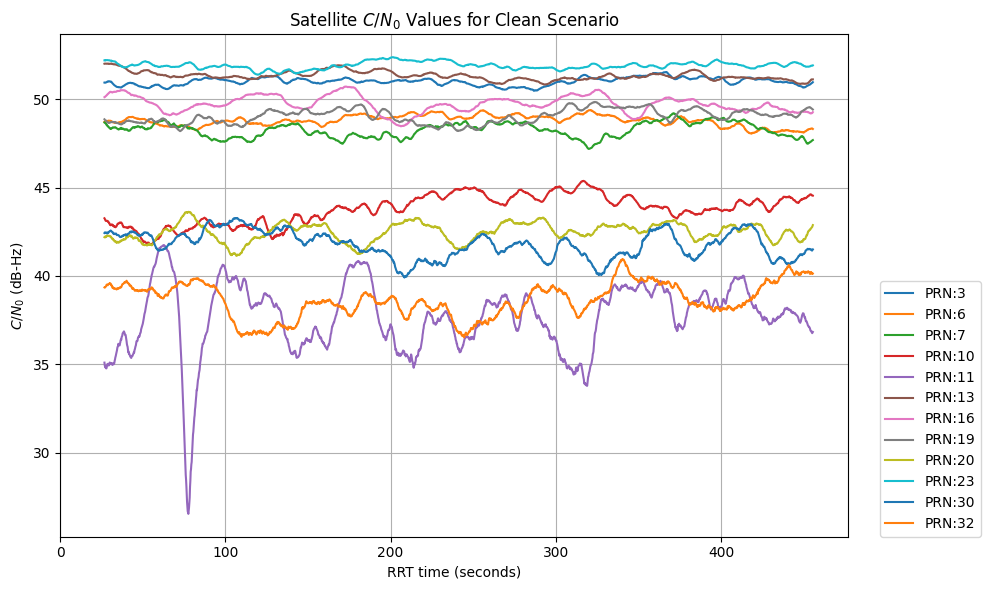

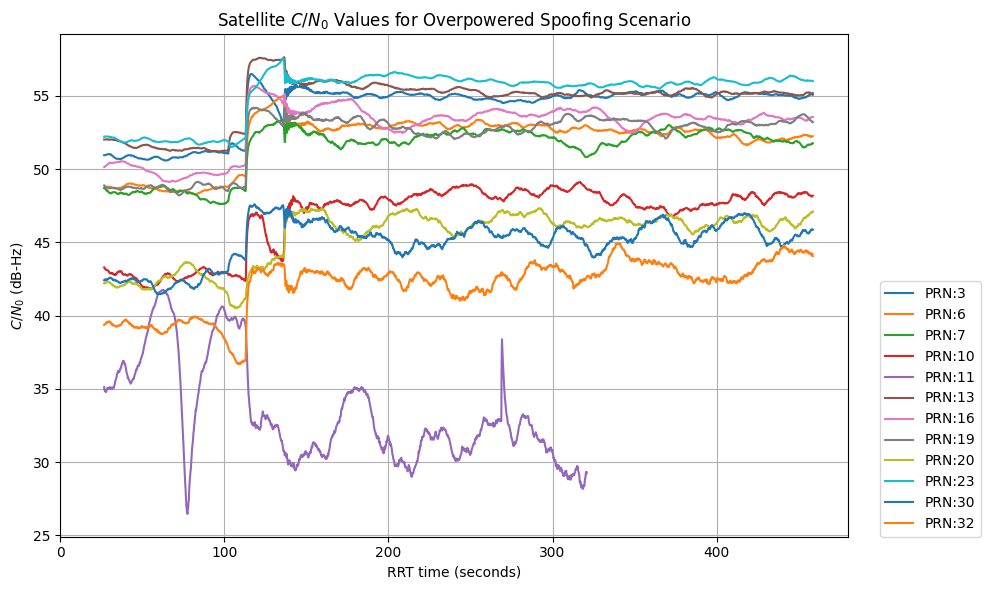

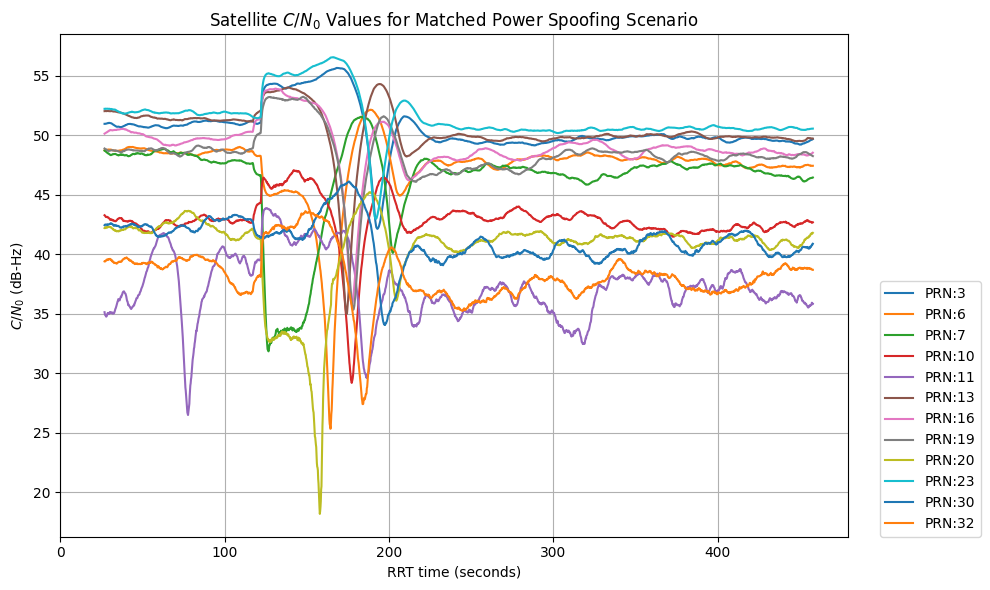

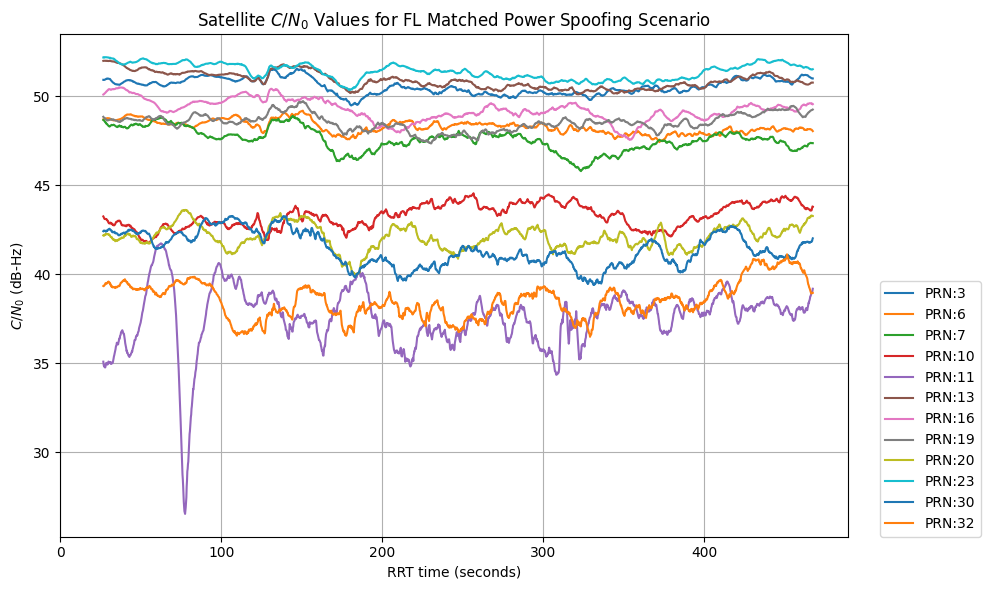

2145
13    26.800556
27    27.000556
41    27.200556
55    27.400556
69    27.600556
Name: RRTseconds, dtype: float64


In [90]:
clean_power2MHz_df = power_parse('data/cleanStatic/cd1power2MHz.mat', norm = False)
ds2_power2MHz_df = power_parse('data/ds2/tb2power2MHz.mat',  norm = False)
ds3_power2MHz_df = power_parse('data/ds3/tb3power2MHz.mat',  norm = False)
ds7_power2MHz_df = power_parse('data/ds7/tb7power2MHz.mat',  norm = False)

print(len(clean_power2MHz_df))
print(clean_power2MHz_df.head())
print()

clean_channel_df = channel_parse('data/cleanStatic/channel.mat')
ds2_channel_df = channel_parse('data/ds2/channel.mat')
ds3_channel_df = channel_parse('data/ds3/channel.mat')
ds7_channel_df = channel_parse('data/ds7/channel.mat')

colmn_names = ['RRTweek', 'RRTseconds', 'ORTweek', 
                    'ORTseconds','ORT_fract_sec', 'Doppler_f',
                    'Beat_carrier_phi', 'Pseudo_m', 'CN0',
                    'valid', 'err_id', 'status', 'type', 'TXID']

# masterlist = [list(clean_channel_df[clean_channel_df['TXID'] == 3]['RRTseconds'])]

# for df in [clean_channel_df, ds2_channel_df, ds3_channel_df, ds7_channel_df]:
#     dflist = []
#     for prn in df['TXID'].unique():
#         if prn<=32:
#             df[df['TXID'] == prn]['Beat_carrier_phi']


titles = ['Satellite $C/N_0$ Values for Clean Scenario','Satellite $C/N_0$ Values for Overpowered Spoofing Scenario','Satellite $C/N_0$ Values for Matched Power Spoofing Scenario','Satellite $C/N_0$ Values for FL Matched Power Spoofing Scenario']
dfs = [clean_channel_df, ds2_channel_df, ds3_channel_df, ds7_channel_df]

for i in range(4): # in [clean_channel_df, ds2_channel_df, ds3_channel_df, ds7_channel_df]:
    df = dfs[i]
    fig = plt.figure()
    plt.title(titles[i])
    for prn in df['TXID'].unique():
        if prn<=32:
            plt.plot(df[df['TXID'] == prn]['RRTseconds'],df[df['TXID'] == prn]['CN0'], label = f'PRN:{prn}')
    #plt.legend()
    plt.legend(loc=(1.04, 0))
    plt.grid()
    plt.xlim(0)
    plt.xlabel('RRT time (seconds)')
    plt.ylabel('$C/N_0$ (dB-Hz)')
    fig.set_figheight(6)
    fig.set_figwidth(10)
    fig.tight_layout()
    plt.show()
    
df = clean_channel_df
print(len(df[df['TXID'] == prn]['RRTseconds']))
print(df[df['TXID'] == prn]['RRTseconds'].head())


# fig = plt.figure()
# for df in [clean_power2MHz_df, ds2_power2MHz_df, ds3_power2MHz_df, ds7_power2MHz_df]:
#     print(df.head())
#     plt.plot(df['time'],df['power'])
# plt.xlim(0)
# plt.grid()
# plt.xlabel('RRT time (seconds)')
# plt.ylabel('$Power$ (dB)')
# plt.show()

In [3]:
#channel_parse(inputfilename)
clean_channel_df = channel_parse('data/cleanStatic/channel.mat')
ds2_channel_df = channel_parse('data/ds2/channel.mat')
ds3_channel_df = channel_parse('data/ds3/channel.mat')
ds7_channel_df = channel_parse('data/ds7/channel.mat')

#iq_parse(inputfilename)
clean_iq_df = iq_parse('data/cleanStatic/iq.mat')
ds2_iq_df = iq_parse('data/ds2/iq.mat')
ds3_iq_df = iq_parse('data/ds3/iq.mat')
ds7_iq_df = iq_parse('data/ds7/iq.mat')

#navsol_parse(inputfilename)
clean_navsol_df = navsol_parse('data/cleanStatic/navsol.mat')
ds2_navsol_df = navsol_parse('data/ds2/navsol.mat')
ds3_navsol_df = navsol_parse('data/ds3/navsol.mat')
ds7_navsol_df = navsol_parse('data/ds7/navsol.mat')

In [4]:
ds7_channel_df['ORTtime'] = ds7_channel_df['ORTseconds'] + ds7_channel_df['ORT_fract_sec']
ds7_channel_df.drop(columns=['ORTweek','ORTseconds','ORT_fract_sec'], axis=1, inplace=True)
ds7_navsol_df['ORTtime'] = ds7_navsol_df['ORTseconds'] + ds7_navsol_df['ORT_fract_sec']
ds7_navsol_df.drop(columns=['ORTweek','ORTseconds','ORT_fract_sec'], axis=1, inplace=True)
ds7_iq_df['ORTtime'] = ds7_iq_df['ORTseconds'] + ds7_iq_df['ORT_fract_sec']
ds7_iq_df.drop(columns=['ORTweek','ORTseconds','ORT_fract_sec'], axis=1, inplace=True)

In [5]:
ds3_channel_df['ORTtime'] = ds3_channel_df['ORTseconds'] + ds3_channel_df['ORT_fract_sec']
ds3_channel_df.drop(columns=['ORTweek','ORTseconds','ORT_fract_sec'], axis=1, inplace=True)
ds3_navsol_df['ORTtime'] = ds3_navsol_df['ORTseconds'] + ds3_navsol_df['ORT_fract_sec']
ds3_navsol_df.drop(columns=['ORTweek','ORTseconds','ORT_fract_sec'], axis=1, inplace=True)
ds3_iq_df['ORTtime'] = ds3_iq_df['ORTseconds'] + ds3_iq_df['ORT_fract_sec']
ds3_iq_df.drop(columns=['ORTweek','ORTseconds','ORT_fract_sec'], axis=1, inplace=True)

In [6]:
ds2_channel_df['ORTtime'] = ds2_channel_df['ORTseconds'] + ds2_channel_df['ORT_fract_sec']
ds2_channel_df.drop(columns=['ORTweek','ORTseconds','ORT_fract_sec'], axis=1, inplace=True)
ds2_navsol_df['ORTtime'] = ds2_navsol_df['ORTseconds'] + ds2_navsol_df['ORT_fract_sec']
ds2_navsol_df.drop(columns=['ORTweek','ORTseconds','ORT_fract_sec'], axis=1, inplace=True)
ds2_iq_df['ORTtime'] = ds2_iq_df['ORTseconds'] + ds2_iq_df['ORT_fract_sec']
ds2_iq_df.drop(columns=['ORTweek','ORTseconds','ORT_fract_sec'], axis=1, inplace=True)

In [7]:
clean_channel_df['ORTtime'] = clean_channel_df['ORTseconds'] + clean_channel_df['ORT_fract_sec']
clean_channel_df.drop(columns=['ORTweek','ORTseconds','ORT_fract_sec'], axis=1, inplace=True)
clean_navsol_df['ORTtime'] = clean_navsol_df['ORTseconds'] + clean_navsol_df['ORT_fract_sec']
clean_navsol_df.drop(columns=['ORTweek','ORTseconds','ORT_fract_sec'], axis=1, inplace=True)
clean_iq_df['ORTtime'] = clean_iq_df['ORTseconds'] + clean_iq_df['ORT_fract_sec']
clean_iq_df.drop(columns=['ORTweek','ORTseconds','ORT_fract_sec'], axis=1, inplace=True)

In [8]:
ds2_channel_df.drop(ds2_channel_df[ds2_channel_df['TXID'] > 32].index, inplace=True)
ds2_iq_df.drop(ds2_iq_df[ds2_iq_df['TXID'] > 32].index, inplace=True)
ds3_channel_df.drop(ds3_channel_df[ds3_channel_df['TXID'] > 32].index, inplace=True)
ds3_iq_df.drop(ds3_iq_df[ds3_iq_df['TXID'] > 32].index, inplace=True)
ds7_channel_df.drop(ds7_channel_df[ds7_channel_df['TXID'] > 32].index, inplace=True)
ds7_iq_df.drop(ds7_iq_df[ds7_iq_df['TXID'] > 32].index, inplace=True)
clean_channel_df.drop(clean_channel_df[clean_channel_df['TXID'] > 32].index, inplace=True)
clean_iq_df.drop(clean_iq_df[clean_iq_df['TXID'] > 32].index, inplace=True)

In [31]:
ds3_navsol_df

,x_recv,y_recv,z_recv,deltR,xdot_recv,ydot_recv,zdot_recv,deltRdot,sol_flag,ORTtime
0,-741997.121401,-5.462280e+06,3.198062e+06,70884.072247,0.0,0.0,0.0,0.070165,2,477918.371994
1,-741995.561726,-5.462274e+06,3.198055e+06,70879.334894,0.0,0.0,0.0,0.072742,2,477918.571994
2,-741995.229737,-5.462273e+06,3.198053e+06,70878.380728,0.0,0.0,0.0,0.058234,2,477918.771994
3,-741995.267172,-5.462277e+06,3.198056e+06,70881.972322,0.0,0.0,0.0,0.063733,2,477918.971994
4,-741994.869999,-5.462274e+06,3.198054e+06,70880.048894,0.0,0.0,0.0,0.067489,2,477919.171994
...,...,...,...,...,...,...,...,...,...,...
2091,-741991.792388,-5.462228e+06,3.198023e+06,70837.481767,0.0,0.0,0.0,0.056091,2,478336.572831
2092,-741991.792705,-5.462228e+06,3.198023e+06,70837.482288,0.0,0.0,0.0,0.063967,2,478336.772831
2093,-741991.793082,-5.462228e+06,3.198023e+06,70837.482898,0.0,0.0,0.0,0.070384,2,478336.972831
2094,-741991.793526,-5.462228e+06,3.198023e+06,70837.483758,0.0,0.0,0.0,0.057964,2,478337.172831


In [9]:
ds7_channel_df

,RRTweek,RRTseconds,Doppler_f,Beat_carrier_phi,Pseudo_m,CN0,valid,err_id,status,type,TXID,ORTtime
0,0,26.800556,766.088501,-2.076790e+04,2.098547e+07,50.934761,1,0,6,0,3,477906.169000
1,0,26.800556,-522.856140,1.378626e+04,2.191315e+07,48.713936,1,0,6,0,6,477906.169000
2,0,26.800556,1853.168945,-4.967647e+04,2.268528e+07,48.678989,1,0,6,0,7,477906.169000
3,0,26.800556,632.961731,-1.718500e+04,2.393206e+07,43.262276,1,0,6,0,10,477906.169000
4,0,26.800556,1916.854004,-5.125002e+04,2.603661e+07,35.100704,1,0,6,0,11,477906.169000
...,...,...,...,...,...,...,...,...,...,...,...,...
30863,0,467.601385,2437.661133,-1.184569e+06,2.197129e+07,49.264984,1,0,6,0,19,478346.969829
30864,0,467.601385,-2956.442871,1.386074e+06,2.415444e+07,43.281380,1,0,6,0,20,478346.969829
30865,0,467.601385,-708.008911,2.634097e+05,2.015014e+07,51.531696,1,0,6,0,23,478346.969829
30866,0,467.601385,-3315.700439,1.552789e+06,2.457514e+07,42.029873,1,0,6,0,30,478346.969829


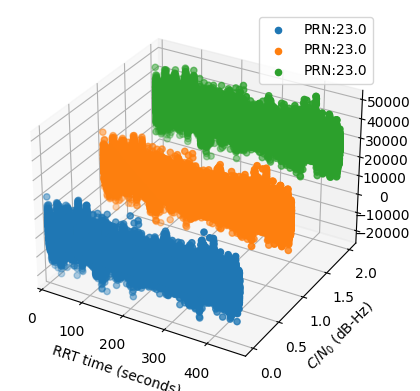

         RRTweek  RRTseconds  type   TXID  phase_tap_0  phase_tap_1  \
0            0.0    0.635204   0.0   16.0      -3864.0       1056.0   
1            0.0    0.641247   0.0   20.0      -4764.0      -1046.0   
2            0.0    0.645204   0.0   16.0      -5828.0      -7000.0   
3            0.0    0.648437   0.0   11.0     -10228.0      -7838.0   
4            0.0    0.651247   0.0   20.0      -1418.0       2886.0   
...          ...         ...   ...    ...          ...          ...   
1001501      0.0  455.949931  13.0  133.0      28848.0        684.0   
1001502      0.0  455.950230   0.0   13.0       8314.0      19258.0   
1001503      0.0  455.951388   0.0    3.0        -58.0       9664.0   
1001504      0.0  455.951246   0.0   10.0      -8556.0      -2504.0   
1001505      0.0  455.950827  13.0  138.0      37786.0       -128.0   

         phase_tap_2  phase_tap_3  phase_tap_4  phase_tap_5  ...  quad_tap_31  \
0             7102.0       9892.0      14398.0      18306.0  ...  

,RRTweek,RRTseconds,type,TXID,phase_tap_0,phase_tap_1,phase_tap_2,phase_tap_3,phase_tap_4,phase_tap_5,...,quad_tap_31,quad_tap_32,quad_tap_33,quad_tap_34,quad_tap_35,quad_tap_36,quad_tap_37,quad_tap_38,quad_tap_39,quad_tap_40
0,0.0,0.635204,0.0,16.0,-3864.0,1056.0,7102.0,9892.0,14398.0,18306.0,...,-78854.0,-69568.0,-61430.0,-50856.0,-41260.0,-31084.0,-23194.0,-14166.0,-6630.0,2104.0
1,0.0,0.641247,0.0,20.0,-4764.0,-1046.0,5116.0,9530.0,16066.0,20806.0,...,-8876.0,-8014.0,-6202.0,-3592.0,-1500.0,-804.0,900.0,1384.0,2620.0,4392.0
2,0.0,0.645204,0.0,16.0,-5828.0,-7000.0,-9852.0,-13248.0,-14274.0,-16546.0,...,-88392.0,-77696.0,-68878.0,-58810.0,-49454.0,-38594.0,-29484.0,-19986.0,-9014.0,-2548.0
3,0.0,0.648437,0.0,11.0,-10228.0,-7838.0,-6106.0,-3612.0,-2506.0,-2740.0,...,-26858.0,-25512.0,-22190.0,-19348.0,-17056.0,-14346.0,-11520.0,-7932.0,-3236.0,354.0
4,0.0,0.651247,0.0,20.0,-1418.0,2886.0,5976.0,10476.0,14246.0,18226.0,...,13540.0,10956.0,10168.0,7704.0,6568.0,7878.0,8976.0,7548.0,6220.0,6276.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1001501,0.0,455.949931,13.0,133.0,28848.0,684.0,-5756.0,0.0,52888.0,65524.0,...,-1208.0,-964.0,-478.0,-542.0,-212.0,-690.0,-2660.0,-3608.0,-3866.0,-3692.0
1001502,0.0,455.950230,0.0,13.0,8314.0,19258.0,31486.0,43146.0,55278.0,66680.0,...,2746.0,2014.0,4344.0,4582.0,4694.0,4168.0,3308.0,3474.0,3866.0,3204.0
1001503,0.0,455.951388,0.0,3.0,-58.0,9664.0,21286.0,33160.0,46202.0,57806.0,...,-644.0,-66.0,-904.0,-1266.0,-1174.0,-40.0,1330.0,2936.0,4330.0,4288.0
1001504,0.0,455.951246,0.0,10.0,-8556.0,-2504.0,2080.0,7334.0,13304.0,20392.0,...,10290.0,9218.0,10288.0,9516.0,8700.0,8326.0,8452.0,6690.0,5000.0,4084.0


In [128]:
clean_iqtaps_df = iq_taps_parse('data/cleanStatic/iqtaps.mat')
clean_iqtaps_df

In [10]:
ds7_iq_df

,RRTweek,RRTseconds,Beat_carrier_phi,in_phase_acc,quad_acc,data_symbol,type,TXID,ORTtime
0,0,0.635204,-1778.909426,72066.0,-182204.0,0,0,16,0.635204
1,0,0.641247,-1890.816362,90898.0,-4550.0,1,0,20,0.641247
2,0,0.645204,-1806.795719,-40824.0,-184794.0,0,0,16,0.645204
3,0,0.648437,1231.973756,15486.0,-48150.0,0,0,11,0.648437
4,0,0.651247,-1920.561348,80948.0,33868.0,1,0,20,0.651247
...,...,...,...,...,...,...,...,...,...
1027371,0,467.797849,928646.779226,52648.0,1200.0,1,0,11,478347.166293
1027372,0,467.798770,-263549.511200,244910.0,3370.0,1,0,23,478347.167214
1027373,0,467.800218,813609.924310,226994.0,-5862.0,1,0,13,478347.168662
1027374,0,467.801244,240662.856195,99528.0,-4612.0,1,0,10,478347.169688


In [121]:
ds7_iq_df['merge_index'] = list(zip(ds7_iq_df.ORTtime, ds7_iq_df.TXID))
ds2_iq_df['merge_index'] = list(zip(ds2_iq_df.ORTtime, ds2_iq_df.TXID))
ds3_iq_df['merge_index'] = list(zip(ds3_iq_df.ORTtime, ds3_iq_df.TXID))
clean_iq_df['merge_index'] = list(zip(clean_iq_df.ORTtime, clean_iq_df.TXID))

ds7_channel_df['merge_index'] = list(zip(ds7_channel_df.ORTtime, ds7_channel_df.TXID))
ds2_channel_df['merge_index'] = list(zip(ds2_channel_df.ORTtime, ds2_channel_df.TXID))
ds3_channel_df['merge_index'] = list(zip(ds3_channel_df.ORTtime, ds3_channel_df.TXID))
clean_channel_df['merge_index'] = list(zip(clean_channel_df.ORTtime, clean_channel_df.TXID))

In [130]:
ds7_channel_df

,RRTweek,RRTseconds,Doppler_f,Beat_carrier_phi,Pseudo_m,CN0,valid,err_id,status,type,TXID,ORTtime,merge_index
0,0,26.800556,766.088501,-2.076790e+04,2.098547e+07,50.934761,1,0,6,0,3,477906.169000,"(477906.169, 3)"
1,0,26.800556,-522.856140,1.378626e+04,2.191315e+07,48.713936,1,0,6,0,6,477906.169000,"(477906.169, 6)"
2,0,26.800556,1853.168945,-4.967647e+04,2.268528e+07,48.678989,1,0,6,0,7,477906.169000,"(477906.169, 7)"
3,0,26.800556,632.961731,-1.718500e+04,2.393206e+07,43.262276,1,0,6,0,10,477906.169000,"(477906.169, 10)"
4,0,26.800556,1916.854004,-5.125002e+04,2.603661e+07,35.100704,1,0,6,0,11,477906.169000,"(477906.169, 11)"
...,...,...,...,...,...,...,...,...,...,...,...,...,...
30863,0,467.601385,2437.661133,-1.184569e+06,2.197129e+07,49.264984,1,0,6,0,19,478346.969829,"(478346.9698290905, 19)"
30864,0,467.601385,-2956.442871,1.386074e+06,2.415444e+07,43.281380,1,0,6,0,20,478346.969829,"(478346.9698290905, 20)"
30865,0,467.601385,-708.008911,2.634097e+05,2.015014e+07,51.531696,1,0,6,0,23,478346.969829,"(478346.9698290905, 23)"
30866,0,467.601385,-3315.700439,1.552789e+06,2.457514e+07,42.029873,1,0,6,0,30,478346.969829,"(478346.9698290905, 30)"


In [11]:
ds7_navsol_df

,x_recv,y_recv,z_recv,deltR,xdot_recv,ydot_recv,zdot_recv,deltRdot,sol_flag,ORTtime
0,-741976.295961,-5.462163e+06,3.198006e+06,70808.729034,0.0,0.0,0.0,0.003285,2,477912.368997
1,-741979.384484,-5.462178e+06,3.198011e+06,70814.230470,0.0,0.0,0.0,-0.002906,2,477912.568997
2,-741978.752449,-5.462184e+06,3.198014e+06,70816.695995,0.0,0.0,0.0,-0.001501,2,477912.768997
3,-741982.054259,-5.462191e+06,3.198016e+06,70819.564721,0.0,0.0,0.0,-0.004149,2,477912.968997
4,-741982.834671,-5.462191e+06,3.198013e+06,70817.201105,0.0,0.0,0.0,0.014285,2,477913.168997
...,...,...,...,...,...,...,...,...,...,...
2170,-741990.714215,-5.462227e+06,3.198022e+06,71146.764666,0.0,0.0,0.0,-0.011673,2,478346.369829
2171,-741990.714864,-5.462227e+06,3.198022e+06,71146.911903,0.0,0.0,0.0,-0.001791,2,478346.569829
2172,-741990.715362,-5.462227e+06,3.198022e+06,71147.059554,0.0,0.0,0.0,-0.012460,2,478346.769829
2173,-741990.715833,-5.462227e+06,3.198022e+06,71147.207092,0.0,0.0,0.0,-0.011531,2,478346.969829


In [58]:
cleanpower = power_parse('data/cleanStatic/cd1power2MHz.mat', norm = True)
len(cleanpower['time'])

2280

In [ ]:
clean_navsol_df = navsol_parse('data/cleanStatic/navsol.mat')
ds2_navsol_df = navsol_parse('data/ds2/navsol.mat')
ds3_navsol_df = navsol_parse('data/ds3/navsol.mat')
ds7_navsol_df = navsol_parse('data/ds7/navsol.mat')

# unspoofed = []
# spoofed = []
# df = clean_navsol_df
# len(list(df[df['ORTseconds'] >= 478012]['deltRdot']))


# print(clean_navsol_df.head())
# print(ds2_navsol_df.head())
# print(ds3_navsol_df.head())
# print(ds7_navsol_df.head())
#len(clean_navsol_df)

In [124]:
ds7submerged = pd.merge(ds7_channel_df, ds7_iq_df, on='merge_index')
ds7submerged

,RRTweek_x,RRTseconds_x,Doppler_f,Beat_carrier_phi_x,Pseudo_m,CN0,valid,err_id,status,type_x,...,merge_index,RRTweek_y,RRTseconds_y,Beat_carrier_phi_y,in_phase_acc,quad_acc,data_symbol,type_y,TXID_y,ORTtime_y
0,0,407.601403,504.270416,-262817.015158,2.093970e+07,50.517498,1,0,6,0,...,"(478286.96984731674, 3)",0,407.601403,262817.015158,215666.0,-1084.0,1,0,3,478286.969847
1,0,407.801403,504.124908,-262917.840282,2.093968e+07,50.541801,1,0,6,0,...,"(478287.16984725324, 3)",0,407.801403,262917.840282,223182.0,1336.0,1,0,3,478287.169847
2,0,408.001403,503.961914,-263018.636478,2.093966e+07,50.578918,1,0,6,0,...,"(478287.36984718975, 3)",0,408.001403,263018.636478,227020.0,-2296.0,1,0,3,478287.369847
3,0,408.201403,503.711639,-263119.407760,2.093964e+07,50.615784,1,0,6,0,...,"(478287.5698471263, 3)",0,408.201403,263119.407760,229826.0,-9210.0,1,0,3,478287.569847
4,0,408.401403,503.630157,-263220.152267,2.093962e+07,50.632839,1,0,6,0,...,"(478287.7698470629, 3)",0,408.401403,263220.152267,214270.0,-5122.0,1,0,3,478287.769847
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
292,0,466.801385,462.966278,-291445.628515,2.093430e+07,51.033287,1,0,6,0,...,"(478346.1698293221, 3)",0,466.801385,291445.628515,229154.0,-5146.0,1,0,3,478346.169829
293,0,467.001385,463.041931,-291538.206143,2.093429e+07,51.024673,1,0,6,0,...,"(478346.3698292642, 3)",0,467.001385,291538.206143,232320.0,10322.0,0,0,3,478346.369829
294,0,467.201385,462.721802,-291630.756123,2.093427e+07,51.008621,1,0,6,0,...,"(478346.5698292063, 3)",0,467.201385,291630.756123,228972.0,-1264.0,0,0,3,478346.569829
295,0,467.401385,462.721802,-291723.285729,2.093425e+07,51.013683,1,0,6,0,...,"(478346.7698291484, 3)",0,467.401385,291723.285729,230814.0,5398.0,1,0,3,478346.769829


In [100]:
ds7submerged.drop(columns=['RRTweek_y','RRTseconds_y','Beat_carrier_phi_x', 'TXID_x', 'ORTtime_x'], axis=1, inplace=True)
ds7submerged.rename(columns={'RRTweek_x': 'RRTweek','RRTseconds_x':'RRTseconds','Beat_carrier_phi_y':'Beat_carrier_phi', 'TXID_y':'TXID', 'ORTtime_y':'ORTtime'}, inplace=True)
ds7submerged.columns

Index(['RRTweek', 'RRTseconds', 'Doppler_f', 'Pseudo_m', 'CN0', 'valid',
       'err_id', 'status', 'type_x', 'merge_index', 'Beat_carrier_phi',
       'in_phase_acc', 'quad_acc', 'data_symbol', 'type_y', 'TXID', 'ORTtime'],
      dtype='object')

In [101]:
ds7submerged

,RRTweek,RRTseconds,Doppler_f,Pseudo_m,CN0,valid,err_id,status,type_x,merge_index,Beat_carrier_phi,in_phase_acc,quad_acc,data_symbol,type_y,TXID,ORTtime
0,0,407.601403,504.270416,2.093970e+07,50.517498,1,0,6,0,"(478286.96984731674, 3)",262817.015158,215666.0,-1084.0,1,0,3,478286.969847
1,0,407.801403,504.124908,2.093968e+07,50.541801,1,0,6,0,"(478287.16984725324, 3)",262917.840282,223182.0,1336.0,1,0,3,478287.169847
2,0,408.001403,503.961914,2.093966e+07,50.578918,1,0,6,0,"(478287.36984718975, 3)",263018.636478,227020.0,-2296.0,1,0,3,478287.369847
3,0,408.201403,503.711639,2.093964e+07,50.615784,1,0,6,0,"(478287.5698471263, 3)",263119.407760,229826.0,-9210.0,1,0,3,478287.569847
4,0,408.401403,503.630157,2.093962e+07,50.632839,1,0,6,0,"(478287.7698470629, 3)",263220.152267,214270.0,-5122.0,1,0,3,478287.769847
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
292,0,466.801385,462.966278,2.093430e+07,51.033287,1,0,6,0,"(478346.1698293221, 3)",291445.628515,229154.0,-5146.0,1,0,3,478346.169829
293,0,467.001385,463.041931,2.093429e+07,51.024673,1,0,6,0,"(478346.3698292642, 3)",291538.206143,232320.0,10322.0,0,0,3,478346.369829
294,0,467.201385,462.721802,2.093427e+07,51.008621,1,0,6,0,"(478346.5698292063, 3)",291630.756123,228972.0,-1264.0,0,0,3,478346.569829
295,0,467.401385,462.721802,2.093425e+07,51.013683,1,0,6,0,"(478346.7698291484, 3)",291723.285729,230814.0,5398.0,1,0,3,478346.769829


In [12]:
ds2merged = pd.merge(ds2_channel_df, ds2_navsol_df, on='ORTtime')
ds3merged = pd.merge(ds3_channel_df, ds3_navsol_df, on='ORTtime')
ds7merged = pd.merge(ds7_channel_df, ds7_navsol_df, on='ORTtime')
cleanmerged = pd.merge(clean_channel_df, clean_navsol_df, on='ORTtime')

In [13]:
ds7merged

,RRTweek,RRTseconds,Doppler_f,Beat_carrier_phi,Pseudo_m,CN0,valid,err_id,status,type,...,ORTtime,x_recv,y_recv,z_recv,deltR,xdot_recv,ydot_recv,zdot_recv,deltRdot,sol_flag
0,0,33.000553,761.676331,-2.550434e+04,2.098457e+07,50.770088,1,0,6,0,...,477912.368997,-741976.295961,-5.462163e+06,3.198006e+06,70808.729034,0.0,0.0,0.0,0.003285,2
1,0,33.000553,-526.563965,1.703965e+04,2.191377e+07,48.653206,1,0,6,0,...,477912.368997,-741976.295961,-5.462163e+06,3.198006e+06,70808.729034,0.0,0.0,0.0,0.003285,2
2,0,33.000553,1852.994263,-6.116588e+04,2.268309e+07,48.400936,1,0,6,0,...,477912.368997,-741976.295961,-5.462163e+06,3.198006e+06,70808.729034,0.0,0.0,0.0,0.003285,2
3,0,33.000553,629.533325,-2.109982e+04,2.393131e+07,42.801380,1,0,6,0,...,477912.368997,-741976.295961,-5.462163e+06,3.198006e+06,70808.729034,0.0,0.0,0.0,0.003285,2
4,0,33.000553,1919.019287,-6.314206e+04,2.603434e+07,35.209564,1,0,6,0,...,477912.368997,-741976.295961,-5.462163e+06,3.198006e+06,70808.729034,0.0,0.0,0.0,0.003285,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26083,0,467.601385,2437.661133,-1.184569e+06,2.197129e+07,49.264984,1,0,6,0,...,478346.969829,-741990.715833,-5.462227e+06,3.198022e+06,71147.207092,0.0,0.0,0.0,-0.011531,2
26084,0,467.601385,-2956.442871,1.386074e+06,2.415444e+07,43.281380,1,0,6,0,...,478346.969829,-741990.715833,-5.462227e+06,3.198022e+06,71147.207092,0.0,0.0,0.0,-0.011531,2
26085,0,467.601385,-708.008911,2.634097e+05,2.015014e+07,51.531696,1,0,6,0,...,478346.969829,-741990.715833,-5.462227e+06,3.198022e+06,71147.207092,0.0,0.0,0.0,-0.011531,2
26086,0,467.601385,-3315.700439,1.552789e+06,2.457514e+07,42.029873,1,0,6,0,...,478346.969829,-741990.715833,-5.462227e+06,3.198022e+06,71147.207092,0.0,0.0,0.0,-0.011531,2


In [57]:
cleanmerged

,RRTweek,RRTseconds,Doppler_f,Beat_carrier_phi,Pseudo_m,CN0,valid,err_id,status,type,...,ORTtime,x_recv,y_recv,z_recv,deltR,xdot_recv,ydot_recv,zdot_recv,deltRdot,sol_flag
0,0,33.000553,761.676331,-2.550434e+04,2.098457e+07,50.770088,1,0,6,0,...,477912.368997,-741976.295961,-5.462163e+06,3.198006e+06,70808.729034,0.0,0.0,0.0,0.003285,2
1,0,33.000553,-526.563965,1.703965e+04,2.191377e+07,48.653206,1,0,6,0,...,477912.368997,-741976.295961,-5.462163e+06,3.198006e+06,70808.729034,0.0,0.0,0.0,0.003285,2
2,0,33.000553,1852.994263,-6.116588e+04,2.268309e+07,48.400936,1,0,6,0,...,477912.368997,-741976.295961,-5.462163e+06,3.198006e+06,70808.729034,0.0,0.0,0.0,0.003285,2
3,0,33.000553,629.533325,-2.109982e+04,2.393131e+07,42.801380,1,0,6,0,...,477912.368997,-741976.295961,-5.462163e+06,3.198006e+06,70808.729034,0.0,0.0,0.0,0.003285,2
4,0,33.000553,1919.019287,-6.314206e+04,2.603434e+07,35.209564,1,0,6,0,...,477912.368997,-741976.295961,-5.462163e+06,3.198006e+06,70808.729034,0.0,0.0,0.0,0.003285,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25363,0,455.601388,2442.603027,-1.155287e+06,2.197652e+07,49.413460,1,0,6,0,...,478334.969832,-741990.331542,-5.462227e+06,3.198022e+06,70833.568556,0.0,0.0,0.0,-0.003958,2
25364,0,455.601388,-2957.176270,1.350595e+06,2.414735e+07,42.877842,1,0,6,0,...,478334.969832,-741990.331542,-5.462227e+06,3.198022e+06,70833.568556,0.0,0.0,0.0,-0.003958,2
25365,0,455.601388,-700.610718,2.549583e+05,2.014819e+07,51.906693,1,0,6,0,...,478334.969832,-741990.331542,-5.462227e+06,3.198022e+06,70833.568556,0.0,0.0,0.0,-0.003958,2
25366,0,455.601388,-3316.742432,1.512994e+06,2.456723e+07,41.503063,1,0,6,0,...,478334.969832,-741990.331542,-5.462227e+06,3.198022e+06,70833.568556,0.0,0.0,0.0,-0.003958,2


In [22]:
len(list(zip(ds7merged.CN0, ds7merged.deltRdot))) #, ds7merged.RRTseconds, ds7merged.ORTtime)))
list(zip(ds7merged.CN0, ds7merged.deltRdot))[:5] #, ds7merged.RRTseconds, ds7merged.ORTtime))[:5]

26088

In [34]:
#
samples = []
zipped = list(zip(ds7merged.CN0, ds7merged.deltRdot))
for i in range(int(len(zipped)/12)):
    point = [zipped[i*12][1]]
    point = point + [zipped[i*12+n][0] for n in range(12)]
    samples.append(point)
ds7_samples = np.array(samples)
print(ds7_samples.shape)
#print(len(samples))
#print(len(samples[0]))
#print(samples[0])
#[[deltRdot, CN0_0, CN0_1, CN0_2, ..., CN0_k],...]

(2174, 13)


In [35]:
#
samples = []
zipped = list(zip(ds3merged.CN0, ds3merged.deltRdot))
for i in range(int(len(zipped)/12)):
    point = [zipped[i*12][1]]
    point = point + [zipped[i*12+n][0] for n in range(12)]
    samples.append(point)
ds3_samples = np.array(samples)
print(ds3_samples.shape)
#print(len(samples))
#print(len(samples[0]))
#print(samples[0])
#[[deltRdot, CN0_0, CN0_1, CN0_2, ..., CN0_k],...]

(2095, 13)


In [36]:
#
samples = []
zipped = list(zip(ds2merged.CN0, ds2merged.deltRdot))
for i in range(int(len(zipped)/12)):
    point = [zipped[i*12][1]]
    point = point + [zipped[i*12+n][0] for n in range(12)]
    samples.append(point)
ds2_samples = np.array(samples)
print(ds2_samples.shape)
#print(len(samples))
#print(len(samples[0]))
#print(samples[0])
#[[deltRdot, CN0_0, CN0_1, CN0_2, ..., CN0_k],...]

(2041, 13)


In [42]:
#
samples = []
zipped = list(zip(cleanmerged.CN0, cleanmerged.deltRdot))
for i in range(int(len(zipped)/12)):
    point = [zipped[i*12][1]]
    point = point + [zipped[i*12+n][0] for n in range(12)]
    samples.append(point)
clean_samples = np.array(samples)
print(clean_samples.shape)
#print(len(samples))
#print(len(samples[0]))
#print(samples[0])
#[[deltRdot, CN0_0, CN0_1, CN0_2, ..., CN0_k],...]

(2114, 13)


In [93]:
clean_deltRdot = clean_samples[:,0]
ds2_deltRdot = ds2_samples[:,0]
ds3_deltRdot = ds3_samples[:,0]
ds7_deltRdot = ds7_samples[:,0]

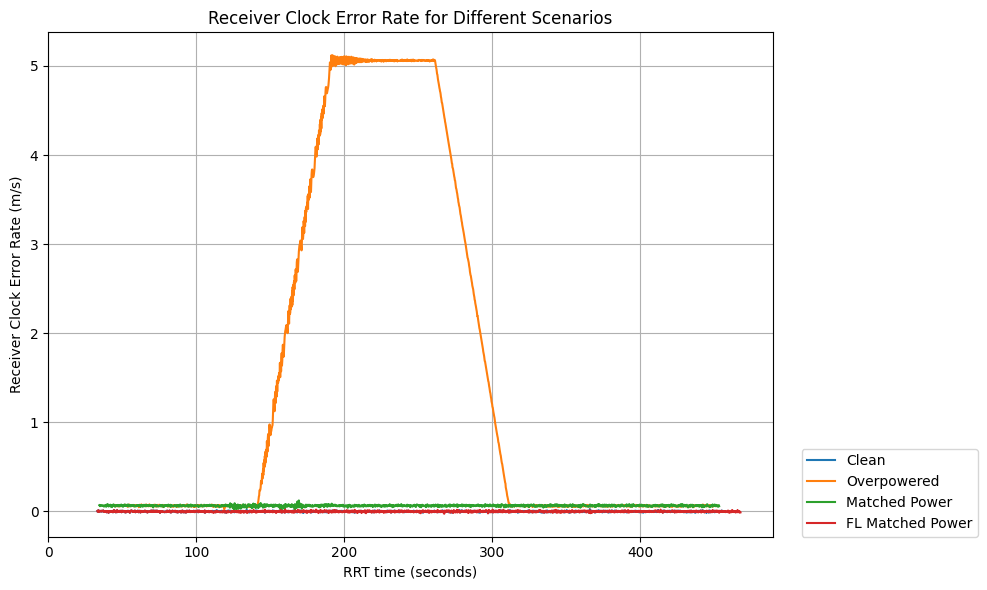

In [96]:
fig = plt.figure()
plt.title('Receiver Clock Error Rate for Different Scenarios')
plt.plot(clean_times, clean_deltRdot, label='Clean')
plt.plot(ds2_times, ds2_deltRdot, label='Overpowered')
plt.plot(ds3_times, ds3_deltRdot, label='Matched Power')
plt.plot(ds7_times, ds7_deltRdot, label='FL Matched Power')
plt.xlim(0)
plt.grid()
plt.xlabel('RRT time (seconds)')
plt.ylabel('Receiver Clock Error Rate (m/s)')
plt.legend(loc=(1.04, 0))
fig.set_figheight(6)
fig.set_figwidth(10)
fig.tight_layout()
plt.show()

In [44]:
ds2_labels = np.concatenate((np.zeros(276),np.ones(1765)))
ds3_labels = np.concatenate((np.zeros(327),np.ones(1768)))
ds7_labels = np.concatenate((np.zeros(384),np.ones(1790)))
clean_labels = np.zeros(2114)

(2041,)
(2095,)
(2174,)
(2114,)


In [55]:
all_data = np.concatenate((clean_samples, ds2_samples, ds3_samples, ds7_samples),axis=0)
all_labels = np.concatenate((clean_labels, ds2_labels, ds3_labels, ds7_labels))

In [47]:
#from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split

#all_data, all_labels = shuffle(all_data, all_labels)

train_data, test_data, train_labels, test_labels = train_test_split(all_data, all_labels, test_size=0.3)
print(train_data.shape)
print(test_data.shape)
print(train_labels.shape)
print(test_labels.shape)

(5896, 13)
(2528, 13)
(5896,)
(2528,)


In [48]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
train_data = scaler.fit_transform(train_data)
test_data = scaler.transform(test_data)

In [66]:
#Import svm model
from sklearn import svm

#Create a svm Classifier
clf = svm.SVC(kernel='linear') # Linear Kernel

#Train the model using the training sets
clf.fit(train_data, train_labels)

#Predict the response for test dataset
y_pred = clf.predict(test_data)

In [67]:
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics

# Model Accuracy: how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(test_labels, y_pred))

Accuracy: 0.807753164556962


In [68]:
# Model Precision: what percentage of positive tuples are labeled as such?
print("Precision:",metrics.precision_score(test_labels, y_pred))

# Model Recall: what percentage of positive tuples are labelled as such?
print("Recall:",metrics.recall_score(test_labels, y_pred))

Precision: 0.8493064312736444
Recall: 0.8450439146800501


In [69]:
from sklearn.metrics import confusion_matrix
tn, fp, fn, tp = confusion_matrix(test_labels, y_pred).ravel()
print("False positives:",fp/(tn+fp+fn+tp))
print("False negatives:",fn/(tn+fp+fn+tp))

False positives: 0.09454113924050633
False negatives: 0.09770569620253164


In [70]:
#Create a svm Classifier
clf_rad = svm.SVC(kernel='rbf') # RBF Kernel

#Train the model using the training sets
clf_rad.fit(train_data, train_labels)

#Predict the response for test dataset
y_pred_rad = clf_rad.predict(test_data)

# Model Accuracy: how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(test_labels, y_pred_rad))

# Model Precision: what percentage of positive tuples are labeled as such?
print("Precision:",metrics.precision_score(test_labels, y_pred_rad))

# Model Recall: what percentage of positive tuples are labelled as such?
print("Recall:",metrics.recall_score(test_labels, y_pred_rad))

Accuracy: 0.9450158227848101
Precision: 0.9986291980808774
Recall: 0.9140526976160602


In [71]:
tn_rad, fp_rad, fn_rad, tp_rad = confusion_matrix(test_labels, y_pred_rad).ravel()
print("False positives:",fp_rad/(tn_rad+fp_rad+fn_rad+tp_rad))
print("False negatives:",fn_rad/(tn_rad+fp_rad+fn_rad+tp_rad))

False positives: 0.0007911392405063291
False negatives: 0.05419303797468354


In [98]:
confusion_matrix(test_labels, y_pred)

array([[ 695,  239],
       [ 247, 1347]], dtype=int64)

## Plotting

In [80]:
#clean_samples
#clean_labels
clean_pred = clf.predict(scaler.transform(clean_samples))
clean_pred_rad = clf_rad.predict(scaler.transform(clean_samples))
clean_times = [i/5 + 33.2 for i in range(2114)]

#ds2_labels
ds2_pred = clf.predict(scaler.transform(ds2_samples))
ds2_pred_rad = clf_rad.predict(scaler.transform(ds2_samples))
ds2_times = [i/5 + 44.8 for i in range(2041)]

#ds3_labels
ds3_pred = clf.predict(scaler.transform(ds3_samples))
ds3_pred_rad = clf_rad.predict(scaler.transform(ds3_samples))
ds3_times = [i/5 + 34.6 for i in range(2095)]

#ds7_labels
ds7_pred = clf.predict(scaler.transform(ds7_samples))
ds7_pred_rad = clf_rad.predict(scaler.transform(ds7_samples))
ds7_times = [i/5 + 33.2 for i in range(2174)]

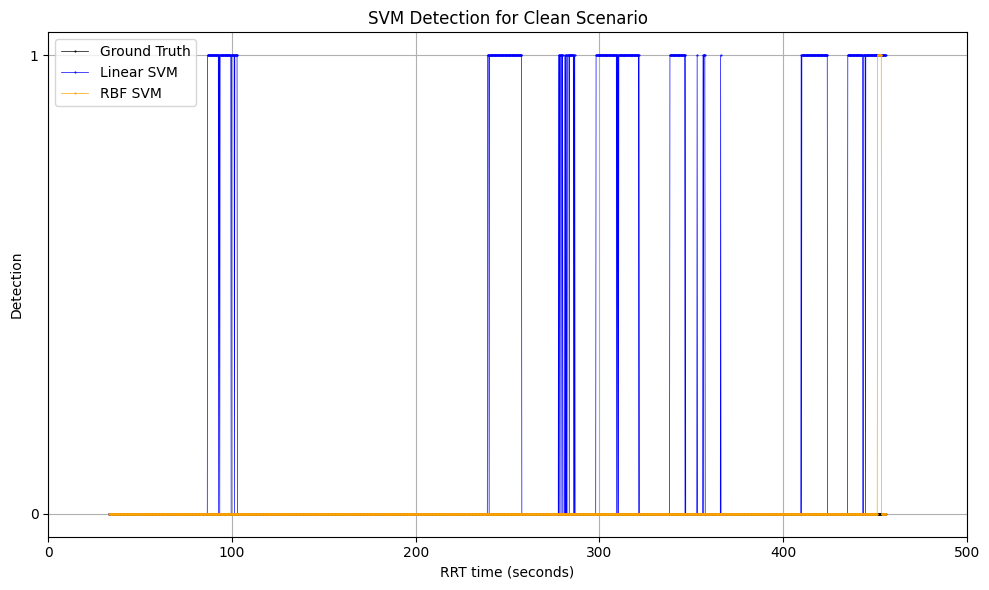

In [84]:
fig = plt.figure()

# axs[0].plot(spoofed_df['time'], spoofed_df['power'] , label = 'ds7', color = 'k')
# axs[0].plot(spoofed_df['time'], np.ones(len(spoofed_df['time']))*mean + m*np.sqrt(variance), '--', color = 'tab:red', label = f'$\pm {m}\sigma$')
# axs[0].plot(spoofed_df['time'], np.ones(len(spoofed_df['time']))*mean - m*np.sqrt(variance), '--', color = 'tab:red')
# axs[0].set_xlim(0,500)
# axs[0].grid()
# axs[0].set_ylabel('P (dB)')
# axs[0].legend()

    # axs[1].plot(spoofed_df['time'],spoofed_h_test, '.-', markersize = 4, lw = 0.5)
    # axs[1].set_xlim(0,500)
    # axs[1].grid()
    # axs[1].set_xlabel('RRT time (seconds)')
    # axs[1].set_ylabel('Detection')
    # axs[1].set_yticks(range(0,2))
    # fig.set_figheight(6)
    # fig.set_figwidth(10)
    # fig.tight_layout()
    # fig.savefig('figures/comparison/'+plot_name+'_h_test.png')

plt.title('SVM Detection for Clean Scenario')
plt.plot(clean_times,clean_labels, '.-', markersize = 1, lw = 0.5, label = 'Ground Truth', color='black')
plt.plot(clean_times,clean_pred, '.-', markersize = 1, lw = 0.5, label = 'Linear SVM', color='blue')
plt.plot(clean_times,clean_pred_rad, '.-', markersize = 1, lw = 0.5, label = 'RBF SVM', color='orange')
#plt.plot(clean_times,clean_pred_rad, '.-', markersize = 1, lw = 0.5, label = '', color='black')
plt.legend()
plt.xlim(0,500)
plt.grid()
plt.xlabel('RRT time (seconds)')
plt.ylabel('Detection')
plt.yticks(range(0,2))
fig.set_figheight(6)
fig.set_figwidth(10)
fig.tight_layout()
plt.show()


#Clean, Overpowered, Matched, FL Matched
#y_pred_rad = clf_rad.predict(test_data)

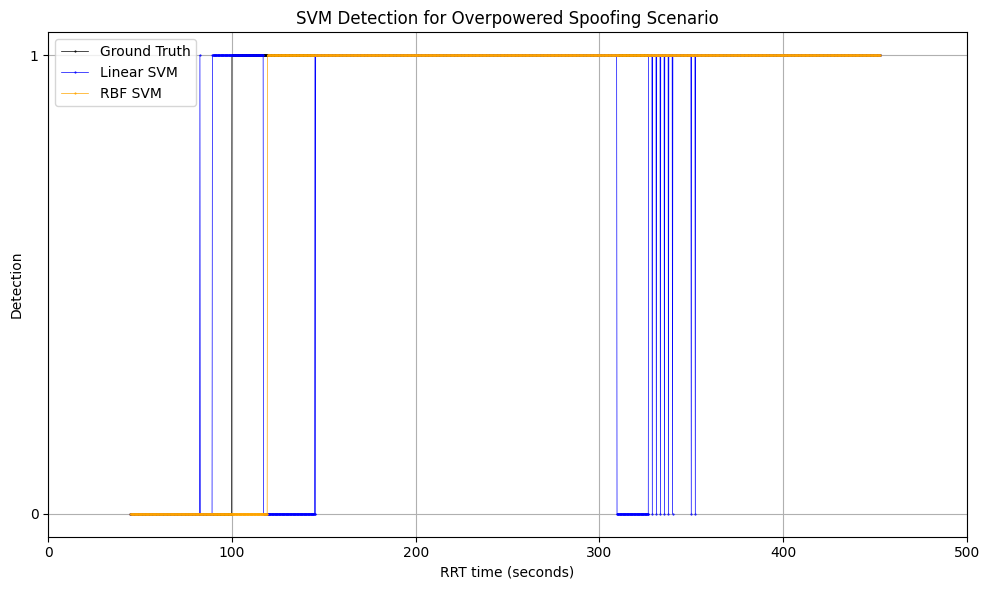

In [85]:
fig = plt.figure()
plt.title('SVM Detection for Overpowered Spoofing Scenario')
plt.plot(ds2_times,ds2_labels, '.-', markersize = 1, lw = 0.5, label = 'Ground Truth', color='black')
plt.plot(ds2_times,ds2_pred, '.-', markersize = 1, lw = 0.5, label = 'Linear SVM', color='blue')
plt.plot(ds2_times,ds2_pred_rad, '.-', markersize = 1, lw = 0.5, label = 'RBF SVM', color='orange')
#plt.plot(clean_times,clean_pred_rad, '.-', markersize = 4, lw = 0.5, label = '', color='black')
plt.legend()
plt.xlim(0,500)
plt.grid()
plt.xlabel('RRT time (seconds)')
plt.ylabel('Detection')
plt.yticks(range(0,2))
fig.set_figheight(6)
fig.set_figwidth(10)
fig.tight_layout()
plt.show()


#Clean, Overpowered, Matched, FL Matched
#y_pred_rad = clf_rad.predict(test_data)

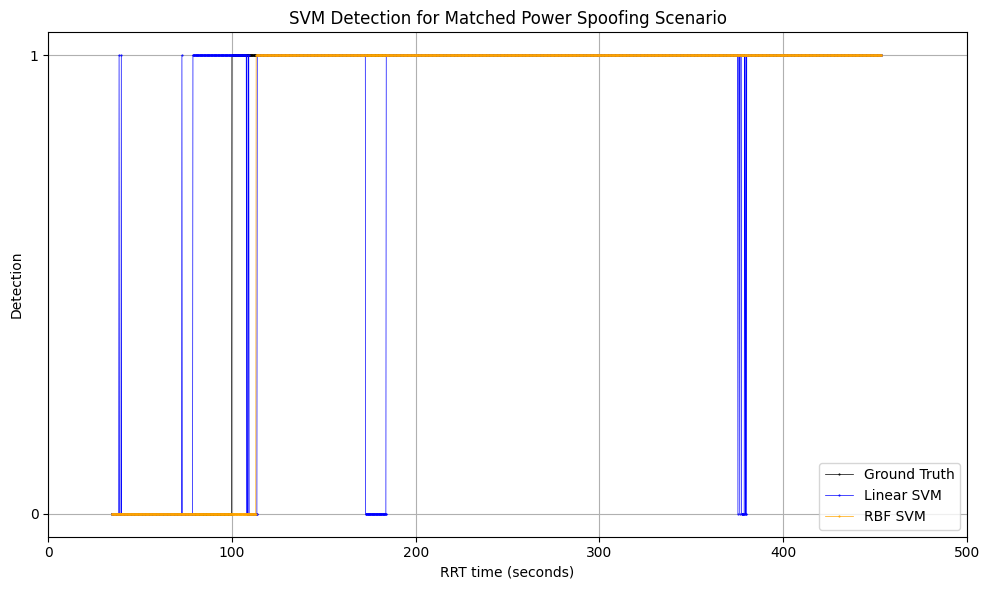

In [86]:
fig = plt.figure()
plt.title('SVM Detection for Matched Power Spoofing Scenario')
plt.plot(ds3_times,ds3_labels, '.-', markersize = 1, lw = 0.5, label = 'Ground Truth', color='black')
plt.plot(ds3_times,ds3_pred, '.-', markersize = 1, lw = 0.5, label = 'Linear SVM', color='blue')
plt.plot(ds3_times,ds3_pred_rad, '.-', markersize = 1, lw = 0.5, label = 'RBF SVM', color='orange')
#plt.plot(clean_times,clean_pred_rad, '.-', markersize = 4, lw = 0.5, label = '', color='black')
plt.legend()
plt.xlim(0,500)
plt.grid()
plt.xlabel('RRT time (seconds)')
plt.ylabel('Detection')
plt.yticks(range(0,2))
fig.set_figheight(6)
fig.set_figwidth(10)
fig.tight_layout()
plt.show()


#Clean, Overpowered, Matched, FL Matched
#y_pred_rad = clf_rad.predict(test_data)

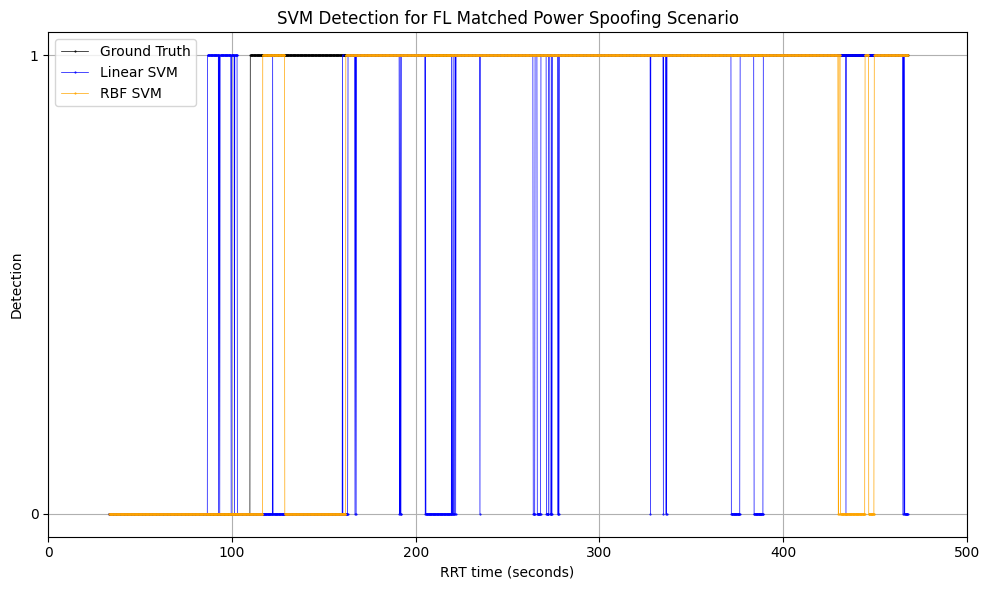

In [87]:
fig = plt.figure()
plt.title('SVM Detection for FL Matched Power Spoofing Scenario')
plt.plot(ds7_times,ds7_labels, '.-', markersize = 1, lw = 0.5, label = 'Ground Truth', color='black')
plt.plot(ds7_times,ds7_pred, '.-', markersize = 1, lw = 0.5, label = 'Linear SVM', color='blue')
plt.plot(ds7_times,ds7_pred_rad, '.-', markersize = 1, lw = 0.5, label = 'RBF SVM', color='orange')
#plt.plot(clean_times,clean_pred_rad, '.-', markersize = 4, lw = 0.5, label = '', color='black')
plt.legend()
plt.xlim(0,500)
plt.grid()
plt.xlabel('RRT time (seconds)')
plt.ylabel('Detection')
plt.yticks(range(0,2))
fig.set_figheight(6)
fig.set_figwidth(10)
fig.tight_layout()
plt.show()


#Clean, Overpowered, Matched, FL Matched
#y_pred_rad = clf_rad.predict(test_data)